In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Features and labels loaded successfully!

Train Accuracy: 0.65
Test Accuracy: 0.62

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2089
           1       0.80      0.67      0.73      2331
           2       0.69      0.67      0.68      2044
           3       0.58      0.59      0.59      2140
           4       0.83      0.50      0.63      2289
           5       0.58      0.39      0.46      1920
           6       1.00      0.89      0.94      2113
           7       0.47      0.53      0.50      2337
           8       0.27      0.58      0.37      2224
           9       1.00      0.83      0.91      2117

    accuracy                           0.65     21604
   macro avg       0.72      0.65      0.67     21604
weighted avg       0.72      0.65      0.67     21604


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89   

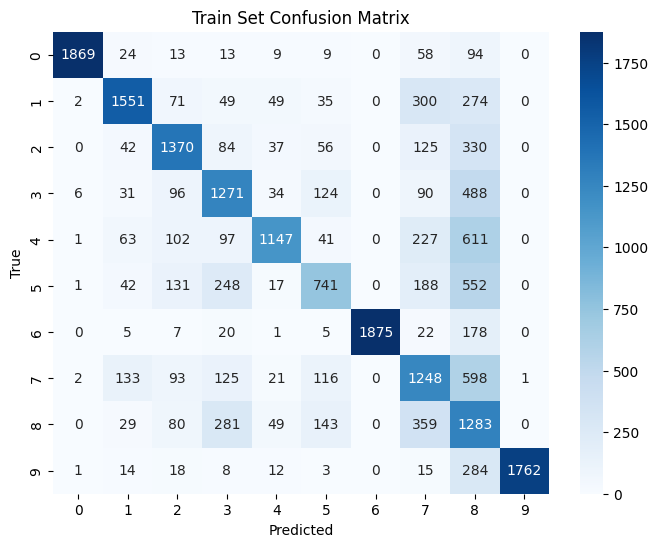


Test Set Confusion Matrix:


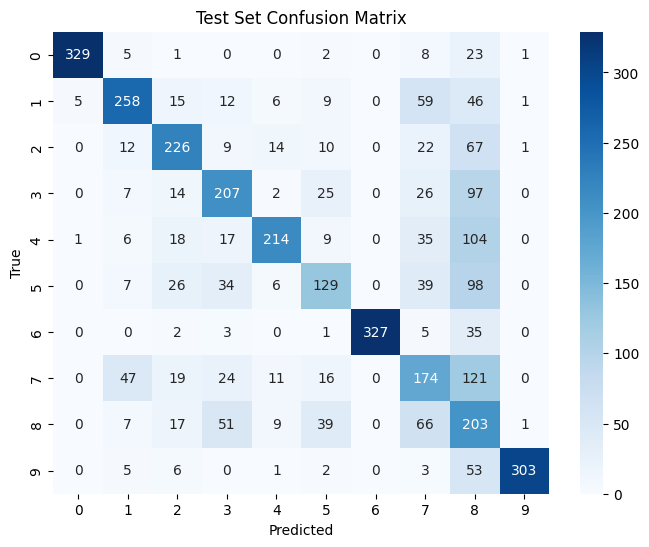

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paths to load the saved features and labels
inception_train_features_path = '/content/drive/My Drive/Final DataSet/inception_train_features.npy'
inception_test_features_path = '/content/drive/My Drive/Final DataSet/inception_test_features.npy'
train_labels_path = '/content/drive/My Drive/Final DataSet/train_labels.npy'
test_labels_path = '/content/drive/My Drive/Final DataSet/test_labels.npy'

# Load the pre-extracted features and labels
X_train = np.load(inception_train_features_path)
X_test = np.load(inception_test_features_path)
y_train = np.load(train_labels_path)
y_test = np.load(test_labels_path)

print("Features and labels loaded successfully!")

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
decision_tree.fit(X_train, y_train)

# Evaluate on train and test sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Print performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nTrain Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display Confusion Matrices
def plot_confusion_matrix(cm, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("\nTrain Set Confusion Matrix:")
plot_confusion_matrix(train_conf_matrix, "Train Set Confusion Matrix")

print("\nTest Set Confusion Matrix:")
plot_confusion_matrix(test_conf_matrix, "Test Set Confusion Matrix")
